#Crowdsourcing Short Squeeze Dashboard
Author: Musfira Mubeen
#Project Overview
This project predicts whether a stock will go up (1) or down (0) the next day. It includes steps like data exploration, feature creation, model training, tuning, and saving the final model.

#import Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Upload dataset
from google.colab import files
files.upload()
df=pd.read_csv('/content/GME_stock.csv')
df.head(5)

Saving GME_stock.csv to GME_stock.csv


,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [ ]:
# Convert date column to datetime
df['date']=pd.to_datetime(df['date'])

In [ ]:
df.set_index('date',inplace=True)

In [ ]:
print(df.head())

            open_price  high_price   low_price  close_price       volume  \
date                                                                       
2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   

            adjclose_price  
date                        
2021-01-28      193.600006  
2021-01-27      347.510010  
2021-01-26      147.979996  
2021-01-25       76.790001  
2021-01-22       65.010002  


#Exploratory Data Analysis

In [ ]:
#First 5 Rows
print("\nFirst Five Rows")
print(df.head())
#Last 5 Rows
print("\nLast Five Rows")
print(df.tail())
#Size of Rows and Columns
print("\nSize of Rows and Columns")
print(df.shape)
#Columns Name
print("\nColumns Name")
print(df.columns)
#Data Type
print("\nData Type")
print(df.dtypes)
#Describe Data
print("\nDescribe Data")
print(df.describe)


First Five Rows
            open_price  high_price   low_price  close_price       volume  \
date                                                                       
2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   

            adjclose_price  
date                        
2021-01-28      193.600006  
2021-01-27      347.510010  
2021-01-26      147.979996  
2021-01-25       76.790001  
2021-01-22       65.010002  

Last Five Rows
            open_price  high_price  low_price  close_price      volume  \
date                                                                     
2002-02-20       9.600       9.875      9.525        9.875   1723200.0   
2002-02-1

In [ ]:
#check Missing Values
print("\nCheck Missing Values")
print(df.isnull().sum())


Check Missing Values
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64


#Filtering

In [ ]:
#Find all days where the closing price was greater than 200.
df[df['close_price']>200]

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-27,354.829987,380.0,249.0,347.51001,93396700.0,347.51001


In [ ]:
#Get all rows where the volume was above 100 million.
df[df['volume']>10000000]

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...
2006-06-30,19.605000,21.000000,18.955000,21.000000,10225200.0,14.139304
2006-01-05,18.700001,19.225000,18.375000,18.655001,16001000.0,12.560413
2005-10-07,15.625000,15.820000,15.240000,15.350000,13208200.0,10.335157


In [ ]:
#Filter the dataset for days where the stock price dropped
df[df['close_price']< df['open_price']]

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-19,41.549999,45.520000,36.639999,39.360001,74721900.0,39.360001
2021-01-15,38.490002,40.750000,34.009998,35.500000,46752200.0,35.500000
...,...,...,...,...,...,...
2002-02-27,9.675000,9.680000,9.500000,9.575000,1022800.0,6.446849
2002-02-22,9.925000,9.925000,9.600000,9.675000,881400.0,6.514178
2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017


In [ ]:
#Select all days where high_price was more than double the low_price.
df[df['high_price']> 2 *df['low_price']]

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001


In [ ]:
#Get data only for January 2021 (using the date column).
df[(df.index.year==2021) & (df.index.month==1)]

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
2021-01-21,39.230000,44.750000,37.000000,43.029999,57079800.0,43.029999
2021-01-20,37.369999,41.189999,36.060001,39.119999,33471800.0,39.119999
2021-01-19,41.549999,45.520000,36.639999,39.360001,74721900.0,39.360001
2021-01-15,38.490002,40.750000,34.009998,35.500000,46752200.0,35.500000


#Sortung


In [ ]:
#Sort the dataset by close_price in descending order.
df.sort_values(by='close_price',ascending=False)

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...
2020-04-01,3.450000,3.490000,3.120000,3.250000,4568700.0,3.250000
2019-08-15,3.320000,3.410000,3.150000,3.210000,5888400.0,3.210000
2020-04-06,2.860000,3.200000,2.830000,3.090000,3340500.0,3.090000


In [ ]:
#Sort the dataset by volume in ascending order.
df.sort_values(by='volume',ascending=True)

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2002-06-18,11.510000,11.575000,11.150000,11.260000,65000.0,7.581358
2002-09-13,10.100000,10.100000,9.800000,9.800000,72000.0,6.598341
2002-06-11,11.310000,11.375000,11.260000,11.375000,80800.0,7.658790
2002-09-17,10.230000,10.430000,9.930000,10.210000,97200.0,6.874393
2002-09-18,10.150000,10.195000,9.925000,10.050000,102000.0,6.766666
...,...,...,...,...,...,...
2021-01-14,38.090000,43.060001,33.049999,39.910000,93717400.0,39.910000
2021-01-13,20.420000,38.650002,20.030001,31.400000,144501700.0,31.400000
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001


In [ ]:
#Sort the dataset by high_price and then by low_price.
df.sort_values(by=['high_price','low_price'],ascending=[True,True])

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2020-04-03,2.850000,2.940000,2.570000,2.800000,3830400.0,2.800000
2020-04-06,2.860000,3.200000,2.830000,3.090000,3340500.0,3.090000
2020-04-02,3.260000,3.350000,2.850000,2.850000,4064300.0,2.850000
2019-08-16,3.250000,3.360000,3.210000,3.320000,3130700.0,3.320000
2019-08-15,3.320000,3.410000,3.150000,3.210000,5888400.0,3.210000
...,...,...,...,...,...,...
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001


In [ ]:
#Sort by date in ascending order.
df.sort_index(ascending=True)

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2002-02-13,9.625000,10.060000,9.525000,10.050000,19054000.0,6.766666
2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003
2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336
2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017
2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838
...,...,...,...,...,...,...
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996


In [ ]:
#Sort by open_price in descending order and display the top 10 rows.
df.sort_values(by='open_price',ascending=False).head(10)

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2007-12-26,63.680000,63.680000,61.830002,62.880001,1714800.0,42.337116
2007-12-24,62.709999,63.500000,61.900002,63.299999,1345500.0,42.619904
2007-12-27,62.529999,63.000000,61.459999,62.200001,2093500.0,41.879269
2007-12-21,62.529999,62.759998,61.230000,61.450001,4129800.0,41.374287
2007-12-28,62.230000,62.990002,61.919998,62.299999,1750000.0,41.946598


#Grouping & Aggregation

In [ ]:
df.groupby(df.index.year)['close_price'].mean()

,close_price
date,
2002,9.562915
2003,6.783849
2004,8.896925
2005,14.449048
2006,22.616873
2007,41.691056
2008,41.829209
2009,25.035595
2010,20.543492


In [ ]:
df.groupby(df.index.month)['volume'].sum()

,volume
date,
1,2.529553e+09
2,9.471513e+08
3,1.258258e+09
4,1.172389e+09
5,1.238209e+09
6,1.367928e+09
7,1.029948e+09
8,1.356297e+09
9,1.263633e+09


In [ ]:
df['day_type']=df['close_price']> df['open_price']
df.groupby('day_type')['volume'].mean()

,volume
day_type,
False,3.287841e+06
True,3.512865e+06


In [ ]:
df['high_price'].resample('w').max()

/tmp/ipython-input-3536987653.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df['high_price'].resample('w').max()


,high_price
date,
2002-02-17,10.195000
2002-02-24,9.925000
2002-03-03,9.850000
2002-03-10,10.500000
2002-03-17,10.950000
...,...
2021-01-03,21.969999
2021-01-10,19.450001
2021-01-17,43.060001


In [ ]:
df.groupby(df.index.year).agg({'low_price':'min','high_price':'max'})

,low_price,high_price
date,,
2002,4.460000,12.150000
2003,3.750000,9.525000
2004,7.185000,11.755000
2005,9.265000,19.205000
2006,15.575000,29.209999
2007,24.950001,63.770000
2008,16.910000,62.290001
2009,20.020000,32.820000
2010,17.120001,25.750000


#Visualization

/tmp/ipython-input-1798482816.py:2: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  weekly_avg=jan_date['close_price'].resample('w').mean()


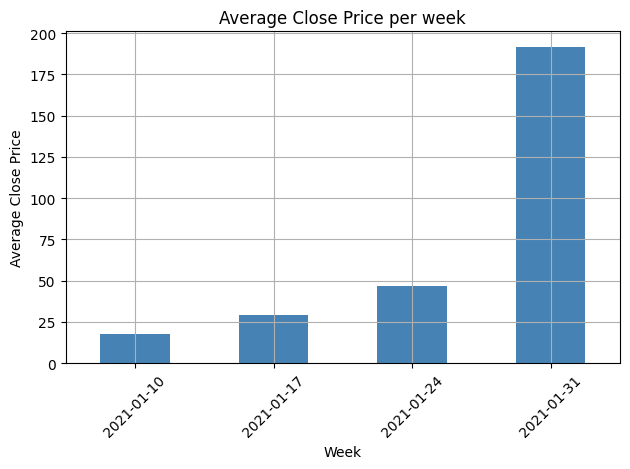

In [ ]:
jan_date=df[(df.index.year==2021) & (df.index.month==1)]
weekly_avg=jan_date['close_price'].resample('w').mean()
weekly_avg.plot(kind='bar',color='steelblue')
plt.title('Average Close Price per week')
plt.xlabel("Week")
plt.ylabel('Average Close Price')
plt.grid(True)
plt.xticks(range(len(weekly_avg)), [date.strftime('%Y-%m-%d') for date in weekly_avg.index], rotation=45)
plt.tight_layout()
plt.show()


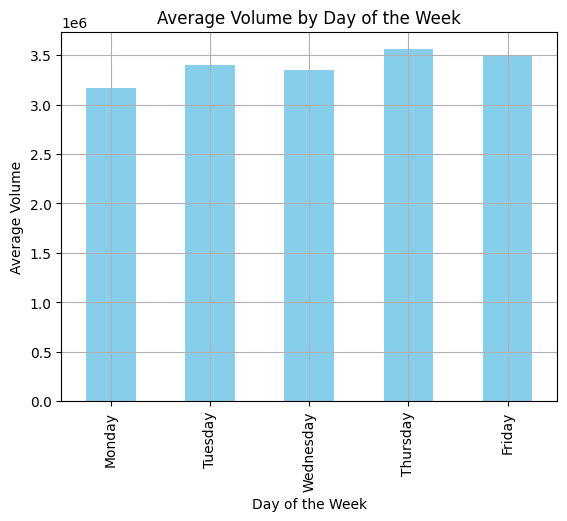

In [ ]:
df['day_of_week'] = df.index.day_name()

avg_volume = df.groupby('day_of_week')['volume'].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
)

# plot bar chart (fixed color)
avg_volume.plot(kind='bar', color='skyblue')

plt.title("Average Volume by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Volume")
plt.grid(True)
plt.show()


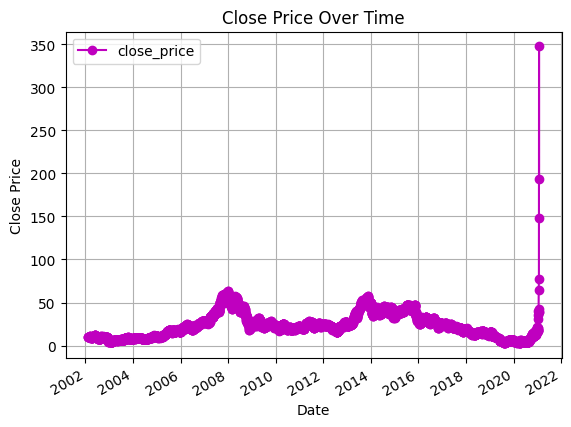

In [ ]:
#Line Plot
df.plot(y='close_price',kind='line',marker='o',linestyle='-',color='m')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


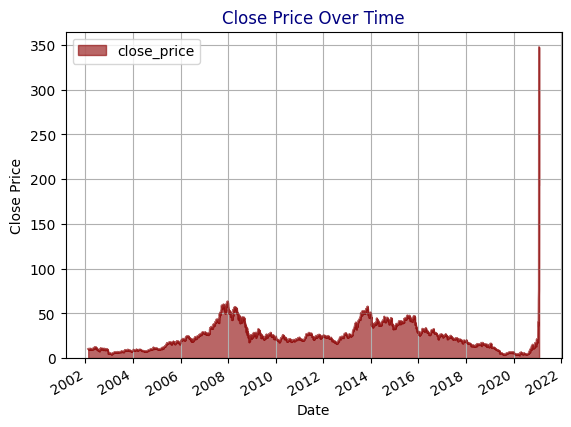

In [ ]:
#Area Plot
df.plot(y='close_price',kind='area',alpha=0.6,color='darkred')
plt.title('Close Price Over Time',color='navy')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


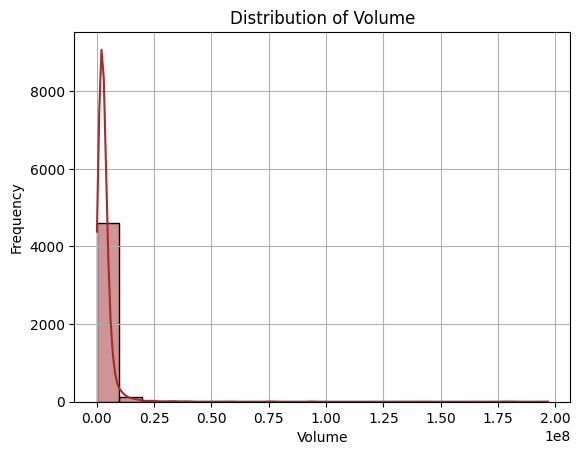

In [ ]:
#Histogram Plot
sns.histplot(x='volume',data=df,bins=20,color='brown',kde=True)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

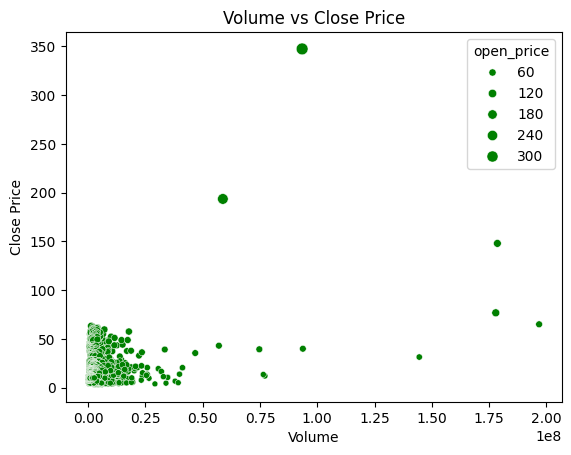

In [ ]:
#Scatter Plot
sns.scatterplot(x='volume',y='close_price',data=df,color='green',size='open_price')
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

#Feature Engineering

In [ ]:
# Create a new column for Daily Return (%)
df['daily_return_pct']=((df['close_price'] - df['open_price'])/df['open_price']) * 100
# Average Price of the Day
df['avg_price']=df['open_price'] + df['close_price']/2
#Price Range
df['price_range']=df['high_price'] - df['low_price']
#Moving Averages
df['MA10']= df['close_price'].rolling(window=10).mean()
df['MA50'] = df['close_price'].rolling(window=50).mean()
#Volume Weighted Average Price
df['VWAP']=(df['close_price'] * df['volume']).cumsum()/ df['volume'].cumsum()

In [ ]:
#fill missing values
df['MA10']=df['MA10'].fillna(df['close_price'])

In [ ]:
#fill missing values
df['MA50']=df['MA50'].fillna(df['close_price'])

In [ ]:
# Shift close_price by 1 day to compare with next day
df['target_updown']=(df['close_price'].shift(-1) >df['close_price']).astype(int)
df=df.dropna()

In [ ]:
print(df.head())

            open_price  high_price   low_price  close_price       volume  \
date                                                                       
2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   

            adjclose_price  daily_return_pct  price_range   avg_price  \
date                                                                    
2021-01-28      193.600006        -26.943394   370.750000  361.800003   
2021-01-27      347.510010         -2.062953   131.000000  528.584991   
2021-01-26      147.979996         67.095754    69.800003  162.549995   
2021-01-25       76.790001        -20.614082    98.049992  135.125004   
2021-01-22       65.010002   

In [ ]:
df.to_csv('stock_features.csv', index=True)